# GPU usage in Python

A gpu can preform many tasks at the same time. As the have thousands of compute cores. These are not the same as CPU cores and have a reduced number of possible operations they can do. GPUs work best doing anything with large arrays of matrix operations. This is why they are so useful with AI, as training and inferences is simplified to a sequence of matrix operations. 

If you are handling large arrays, images or can format your data into arrays to preform operations then the GPU might be work a try.

The following example is of matrix operation you might do. These can be easitly directed to the GPU with a python package called cupy, which allows you to quickly and easily do most numpy operations on the GPU with a simple syntax change.

https://docs.cupy.dev/en/stable/index.html For more info



## Numpy (single core) version

In [9]:
import numpy as np
import cupy as cp
import time
from tqdm import tqdm

# Set the size of the matrices
N_list = np.linspace(2, 10000, 100)
cpu_time_list = []
gpu_time_list = []

for i in tqdm(N_list,total=len(N_list),desc="Processing"):
    
    N = int(i)
    # Create random matrices using NumPy (CPU)
    a_cpu = np.random.rand(N, N).astype(np.float32)
    b_cpu = np.random.rand(N, N).astype(np.float32)

    # Create the same matrices using CuPy (GPU)
    a_gpu = cp.asarray(a_cpu)
    b_gpu = cp.asarray(b_cpu)
    # Perform matrix multiplication using NumPy (CPU)
    start_time = time.time() 
    result_cpu = np.dot(a_cpu, b_cpu) # CPU matrix multiplication uses all available cores
    result_cpu = np.dot(a_cpu, b_cpu) # CPU matrix multiplication uses all available cores
    cpu_time = time.time() - start_time

    # Perform matrix multiplication using CuPy (GPU)
    start_time = time.time()
    result_gpu = cp.dot(a_gpu, b_gpu)
    result_gpu = cp.dot(a_gpu, b_gpu) 

    gpu_time = time.time() - start_time

    cpu_time_list.append(cpu_time)
    gpu_time_list.append(gpu_time)

    # Verify the results make sure they are the same.
    assert cp.allclose(result_gpu, cp.asarray(result_cpu))
    # clear the memory to avoid running out of VRAM
    cp.get_default_memory_pool().free_all_blocks()



Processing: 100%|██████████| 100/100 [02:03<00:00,  1.24s/it]


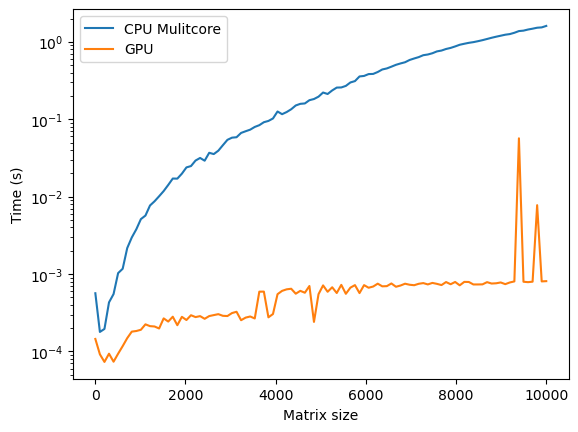

In [10]:
# plot the compute times
import matplotlib.pyplot as plt
plt.plot(N_list, cpu_time_list, label='CPU Mulitcore')
plt.plot(N_list, gpu_time_list, label='GPU')
plt.xlabel('Matrix size')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.legend()
plt.show()